In [3]:
import csv
import slabeventclassify as evc
import matplotlib.pyplot as plt
import numpy as np
import circ

In [10]:
def get_GeoNetevents(szone):
    with open('../5BeachBallsMap/GeoNet_slabevents.csv', 'r') as file:
        csvreader = csv.reader(file)
        header = next(csvreader)
        slat,slon,sdep,sMw,s1,d1,r1,s2,d2,r2 = [],[],[],[],[],[],[],[],[],[]
        hik_count, puy_count = 0,0
        # 'lon,lat,dep,Mw,strike1,dip1,rake1,strike2,dip2,rake2'
        for row in csvreader:
            if float(row[2])>300:
                continue
            if float(row[2])<=10:
                continue
           
            if evc.within_interfacezone(float(row[0]), float(row[1]))==szone:
                slat.append(float(row[1]))
                slon.append(float(row[0]))
                sdep.append(float(row[2]))
                sMw.append(float(row[3]))
                s1.append(float(row[4]))
                d1.append(float(row[5]))
                r1.append(float(row[6]))
                s2.append(float(row[7]))
                d2.append(float(row[8]))
                r2.append(float(row[9]))
    dump = {'lon': slon,'lat': slat, 'dep': sdep, 
            'Mw':sMw, 'strike1': s1, 'dip1': d1,'rake1':r1,
            'strike2':s2, 'dip2':d2, 'rake2': r2,}
    return dump


def cbinning(data_angles,binsize = 10, maxangle = 360):
    # circular count is needed. 
    # binsize must be an integer
    halfbinw = int(binsize/2)
    cbins = [x for x in range(halfbinw,maxangle,halfbinw)]
    bin_count = [0]*len(cbins)
    for cb, i in zip(cbins, range(len(bin_count))):
        lowangle = cb-halfbinw 
        highangle = cb+halfbinw
        for sang in data_angles:
            if sang== highangle:
                sang = lowangle
            if (sang>= lowangle) & (sang<highangle):
                bin_count[i]=bin_count[i]+1

    return cbins, bin_count

def plot_hist(data_angles, ax, stitle ='', facecolor='c'):
    theta, freq = cbinning(data_angles)
    circ.histogram(theta, freq, bs = 2, units="degrees", \
               bars = True, normalized = False, lcolor="k", \
               lwidth = 0.5, facecolor = facecolor, axe = ax)
    ax.set_title(stitle)

    
def plot_binnedboxplots(x, y, fbs =10, min_x = 20, max_x = 300, doplot = True,
                        strtitle='', xlabel='depth (km)', ylabel = 'dip angle (deg)'):
    # plot y according to binnned x
   
    x_bin = [d for d in range(min_x, max_x, fbs)]
    xbox  ={}
    
    for xb in x_bin:
        kx =[]
        for xx, yy in zip(x, y):
            if (xx>=(xb-fbs)) & (xx<(xb+fbs)):
                kx.append(yy)
        xbox.update({xb:kx})
   
    if doplot:
        data = []
        for b in xbox.keys():
            data.append(xbox[b])
        fig = plt.figure(1, figsize=(17,2))
        X = range(1, len(x_bin)+1)
        plt.rcParams.update({'font.size': 13})
        plt.boxplot(data);
        #for dat,x in zip(data,X):
          #  plt.text(x,70, str(len(dat)))
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.xticks([x for x in X],
           [str(xx) for xx in x_bin]);
        plt.title(strtitle, fontsize=13)
    
    return xbox


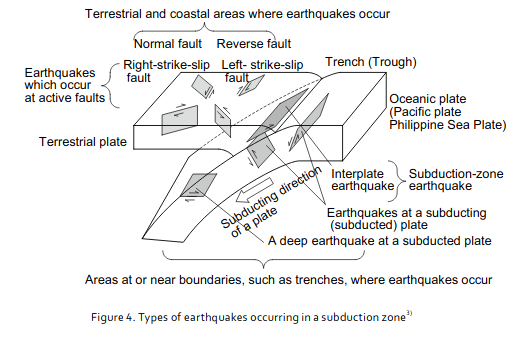

https://www.jaso.jp/pdf/earthquake_resistant.pdf

In [5]:
dump_hik = get_GeoNetevents('hik')
dump_puy = get_GeoNetevents('puy')
slabevents = {'hik': dump_hik, 'puy': dump_puy}

In [ ]:
 stitle = {'hik': 'Hikurangi Slab', 'puy': 'Puysegur slab'}
    fig = plt.figure(1, figsize=(8,10))
    ax1 = fig.add_subplot(121, projection='polar')  
    ax2 = fig.add_subplot(122, projection='polar')  
        plot_hist(slabevents[szone]['strike1'], ax=ax1, stitle ='strike angles-FM1', facecolor='c')
    plot_hist(slabevents[szone]['strike2'], ax=ax2, stitle ='strike angles-FM2', facecolor='c')
    fig.suptitle(stitle[szone], fontsize=14, y=0.71)  
    fig.tight_layout()

In [6]:
def summary_assess(szone, slabevents):
    plot_binnedboxplots(slabevents[szone]['dep'], slabevents['hik']['dip1'], strtitle='solution 1');
    plt.show()
    plot_binnedboxplots(slabevents[szone]['dep'], slabevents['hik']['dip2'], strtitle='Solution 2');

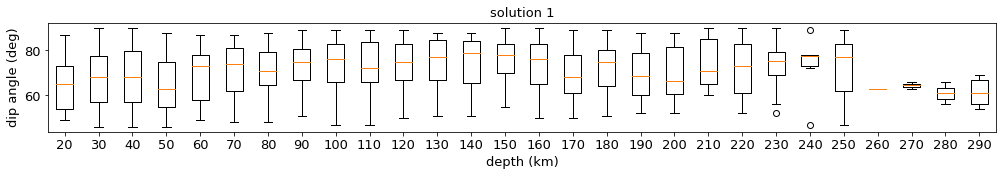

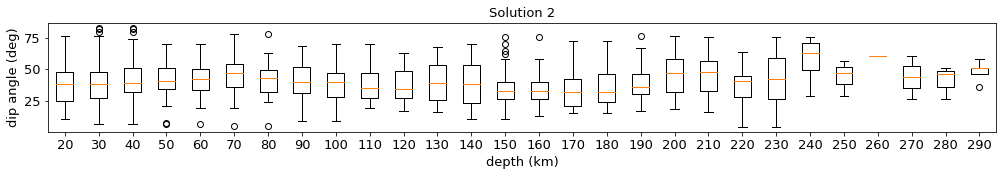

In [7]:
plot_binnedboxplots(slabevents[szone]['dep'], slabevents['hik']['dip1'], doplot=False)
summary_assess('hik', slabevents)


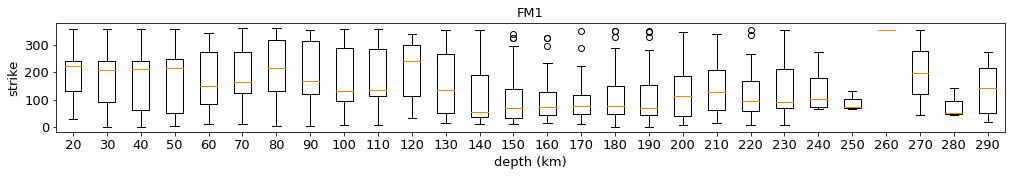

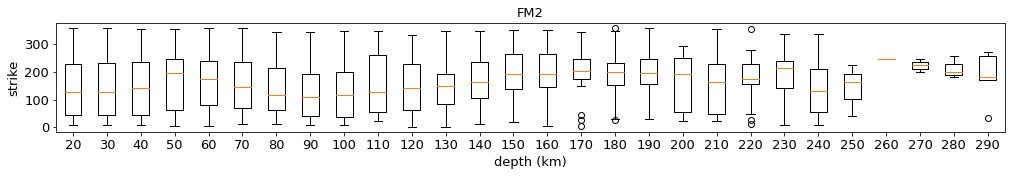

In [36]:
szone = 'hik'
plot_binnedboxplots(slabevents[szone]['dep'], slabevents['hik']['strike1'], strtitle='FM1', ylabel = 'strike');
plt.show()
plot_binnedboxplots(slabevents[szone]['dep'], slabevents['hik']['strike2'], strtitle='FM2', ylabel = 'strike');

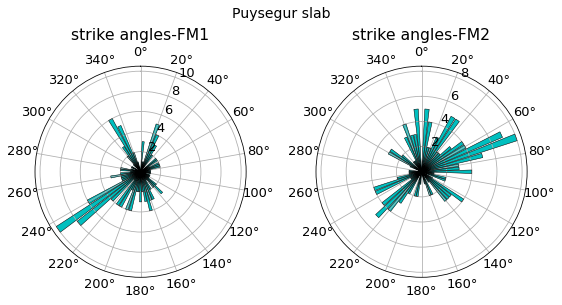

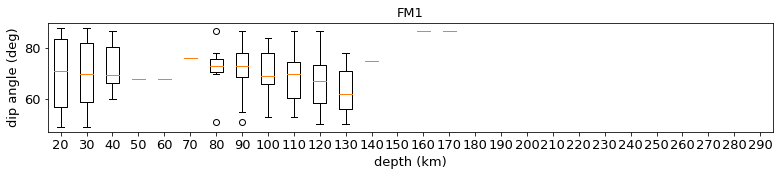

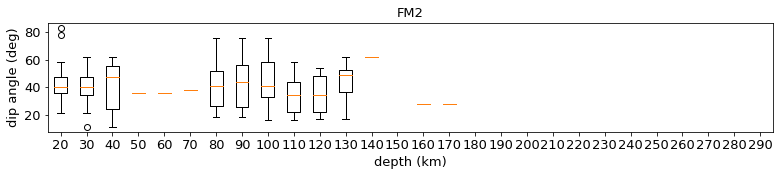

In [32]:
recon_assess('puy', slabevents)

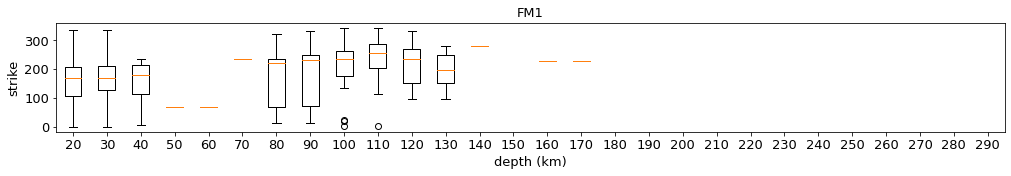

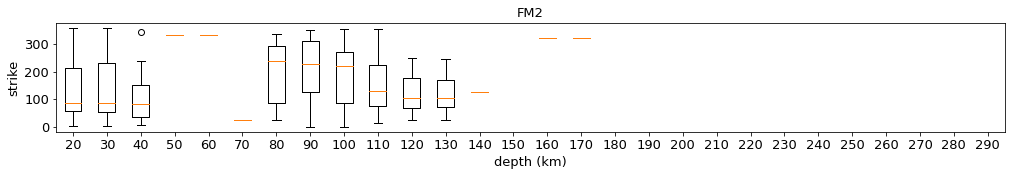

In [11]:
szone = 'puy'
plot_binnedboxplots(slabevents[szone]['dep'], slabevents[szone]['strike1'], strtitle='FM1', ylabel = 'strike');
plt.show()
plot_binnedboxplots(slabevents[szone]['dep'], slabevents[szone]['strike2'], strtitle='FM2', ylabel = 'strike');